In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

%matplotlib inline

In [2]:
test_dir = "splitdata/test"
train_dir = "splitdata/train"
val_dir = "splitdata/val"

In [3]:
#DISINI SAYA MENGGUNAKAN MODEL VGG16

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))
base_model.trainable = False

In [4]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [5]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    prediction_layer
])

In [6]:
image_shape = (150,150,3)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

In [7]:
train_image_gen = image_gen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')

Found 5062 images belonging to 2 classes.


In [8]:
val_image_gen = image_gen.flow_from_directory(val_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 722 images belonging to 2 classes.


In [9]:
test_image_gen = image_gen.flow_from_directory(test_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical',shuffle=False)

Found 1448 images belonging to 2 classes.


In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.000024),
              metrics=['acc'])


In [11]:
results = model.fit(train_image_gen,epochs=100, validation_data=val_image_gen)

Epoch 1/100
159/159 [==============================] - 101s 453ms/step - loss: 0.5658 - acc: 0.7554 - val_loss: 0.4735 - val_acc: 0.8158
Epoch 2/100
159/159 [==============================] - 45s 280ms/step - loss: 0.4330 - acc: 0.8218 - val_loss: 0.4106 - val_acc: 0.8172
Epoch 3/100
159/159 [==============================] - 48s 297ms/step - loss: 0.3943 - acc: 0.8317 - val_loss: 0.3847 - val_acc: 0.8421
Epoch 4/100
159/159 [==============================] - 47s 292ms/step - loss: 0.3717 - acc: 0.8441 - val_loss: 0.3517 - val_acc: 0.8601
Epoch 5/100
159/159 [==============================] - 47s 296ms/step - loss: 0.3560 - acc: 0.8455 - val_loss: 0.3509 - val_acc: 0.8670
Epoch 6/100
159/159 [==============================] - 50s 315ms/step - loss: 0.3358 - acc: 0.8570 - val_loss: 0.3467 - val_acc: 0.8643
Epoch 7/100
159/159 [==============================] - 49s 304ms/step - loss: 0.3285 - acc: 0.8655 - val_loss: 0.3383 - val_acc: 0.8504
Epoch 8/100
159/159 [==========================

Epoch 61/100
159/159 [==============================] - 78s 489ms/step - loss: 0.1889 - acc: 0.9251 - val_loss: 0.1975 - val_acc: 0.9211
Epoch 62/100
159/159 [==============================] - 36s 225ms/step - loss: 0.1880 - acc: 0.9239 - val_loss: 0.1716 - val_acc: 0.9363
Epoch 63/100
159/159 [==============================] - 38s 238ms/step - loss: 0.1860 - acc: 0.9275 - val_loss: 0.1832 - val_acc: 0.9266
Epoch 64/100
159/159 [==============================] - 39s 244ms/step - loss: 0.1849 - acc: 0.9237 - val_loss: 0.1889 - val_acc: 0.9266
Epoch 65/100
159/159 [==============================] - 41s 257ms/step - loss: 0.1860 - acc: 0.9241 - val_loss: 0.1906 - val_acc: 0.9197
Epoch 66/100
159/159 [==============================] - 43s 269ms/step - loss: 0.1824 - acc: 0.9297 - val_loss: 0.1918 - val_acc: 0.9238
Epoch 67/100
159/159 [==============================] - 42s 264ms/step - loss: 0.1835 - acc: 0.9273 - val_loss: 0.1830 - val_acc: 0.9197
Epoch 68/100
159/159 [===================

In [21]:
model.save('modelVGG16.h5')

In [12]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,acc,val_loss,val_acc
0,0.565771,0.755433,0.473531,0.815789
1,0.433038,0.821810,0.410567,0.817174
2,0.394287,0.831687,0.384660,0.842105
3,0.371672,0.844133,0.351670,0.860111
4,0.356039,0.845516,0.350927,0.867036
...,...,...,...,...
95,0.167079,0.937179,0.167738,0.927978
96,0.162562,0.938167,0.163475,0.939058
97,0.165213,0.933030,0.159039,0.940443
98,0.169152,0.933030,0.175545,0.919668


<AxesSubplot:>

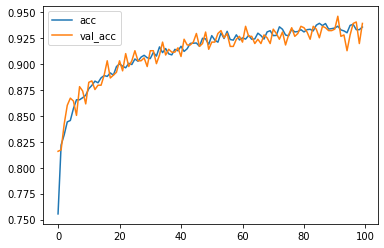

In [13]:
loss_df[['acc', 'val_acc']].plot()

<AxesSubplot:>

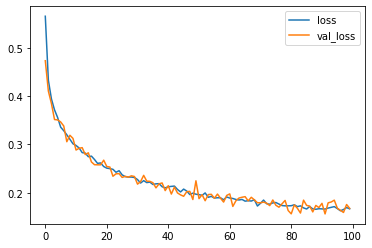

In [14]:
loss_df[['loss', 'val_loss']].plot()

In [15]:
predictions = np.argmax(model.predict(test_image_gen), axis = -1)
predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       724
           1       0.92      0.94      0.93       724

    accuracy                           0.93      1448
   macro avg       0.93      0.93      0.93      1448
weighted avg       0.93      0.93      0.93      1448



[[664  60]
 [ 43 681]]


<AxesSubplot:>

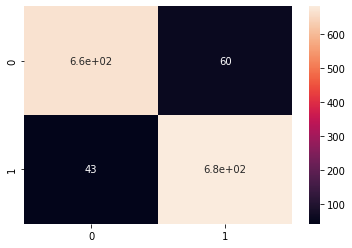

In [16]:
print(confusion_matrix(test_image_gen.classes,predictions))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions), annot = True)

Confusion matrix, without normalization
[[664  60]
 [ 43 681]]


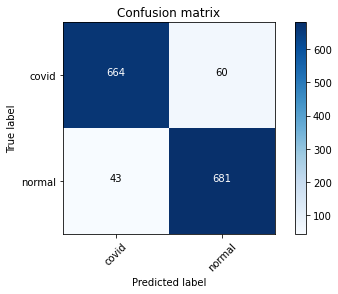

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix=confusion_matrix(test_image_gen.classes,predictions)
plot_confusion_matrix(cnf_matrix, classes=test_image_gen.class_indices)

In [18]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_test_rock = os.path.join('splitdata/test/covid')
file_test_paper = os.path.join('splitdata/test/normal')

rock_image = os.listdir(file_test_rock)
paper_image = os.listdir(file_test_paper)

fRock = [os.path.join(file_test_rock,fname)
        for fname in rock_image[0:5]]

fPaper = [os.path.join(file_test_paper,fname)
        for fname in paper_image[0:5]]

xz = 0

In [19]:
from PIL import Image
import time
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

labels = ['Covid', 'Normal']
labels2 = ['Covid', 'Normal']
value = [fRock, fPaper]
input_size = (150, 150)

title = []
prediksi = []
waktu = []
akurasi = []

for x in list(range(len(labels))):
  for gambar in value[x]:
    title.append(labels2[x])
    im = Image.open(gambar)
    X = preprocess(im, input_size)
    X = reshape([X])
    start = time.time()
    Y = model.predict(X)
    end = time.time()
    times = end-start
    prediksi.append(labels[np.argmax(Y)])
    waktu.append(times)
    akurasi.append(np.max(Y))

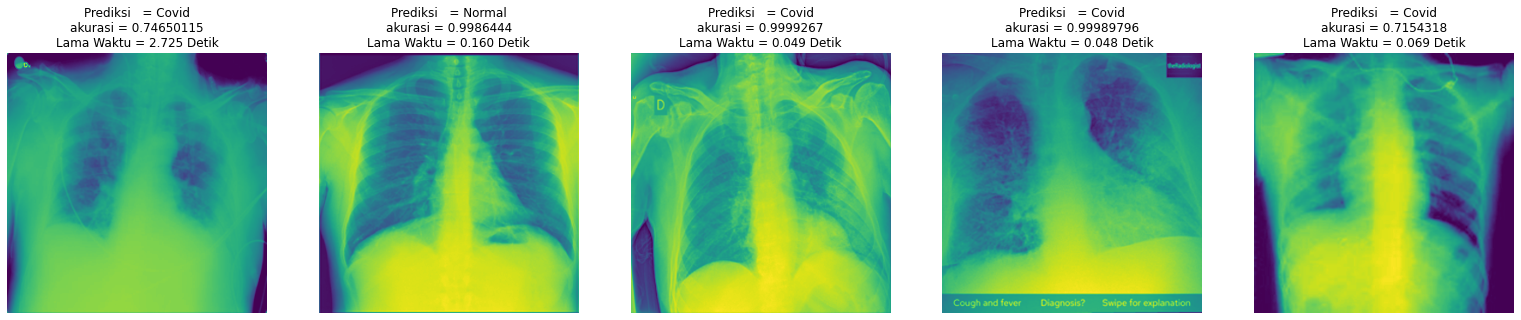

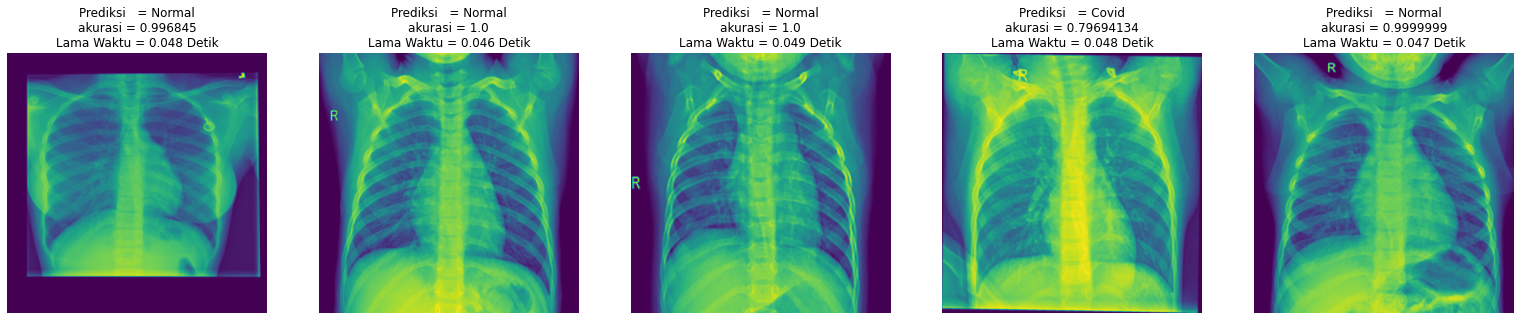

In [20]:
ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fRock):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()

ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fPaper):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()